In [1]:
import pandas as pd
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']


url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names=BHNames)

In [2]:
print(data.head(20))

       crim    zn  indus  chas    nox     rm    age     dis  rad    tax  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('medv', axis = 1)
print('X shape = ',X.shape)
Y = data['medv']
print('Y shape = ',Y.shape)

X shape =  (506, 13)
Y shape =  (506,)


In [4]:
from sklearn import linear_model
import matplotlib.pyplot as plt

names = data.drop('medv', axis =1).columns
print(names)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')


In [5]:
lasso = linear_model.Lasso(alpha=0.2)

In [6]:
lasso_coef = lasso.fit(X,Y).coef_

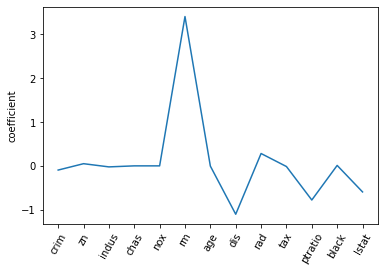

In [7]:
plt.plot(range(len(names)),lasso_coef )
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel("coefficient")
plt.show()

In [8]:
#For Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2)

In [10]:
model = ridge.fit(x_std,Y).coef_

In [11]:
model

array([-0.92646068,  1.07849275,  0.13607368,  0.68243527, -2.05110798,
        2.6759721 ,  0.01817939, -3.09866587,  2.64775331, -2.06318543,
       -2.05894196,  0.84918485, -3.74101393])

In [15]:
rr = Ridge(alpha=0.4)
rr.fit(x_std, Y)

Ridge(alpha=0.4)

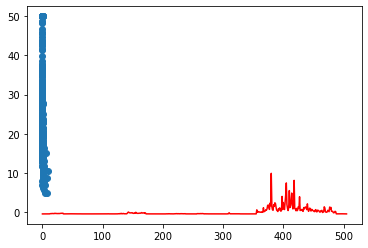

In [17]:
plt.scatter(x_std[:,0], Y)
plt.plot(x_std[:,0], c='red')

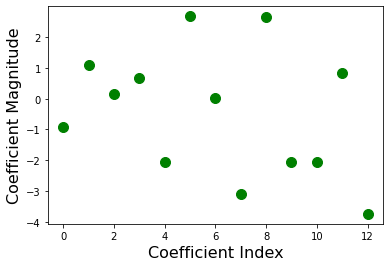

In [24]:
plt.plot(model,linestyle='none',marker='o',markersize=10,color='green')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.show()